**学习使用TFrecord进行数据的读取和写入**

In [13]:
import tensorflow as tf
import os
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

查看path目录下的文件形式

In [14]:
img_dir = "../images"
record_dir = "../local"
os.listdir(record_dir)

['inception_v4.ckpt', 'train.tfrecords']

In [15]:
sess = tf.InteractiveSession()

../images/EnglishCockerSpaniel_simon.jpg


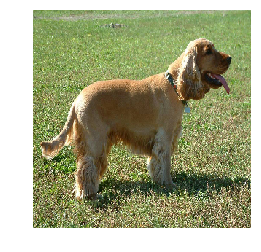

../images/MyComputer.jpeg


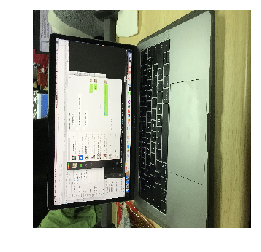

../images/WechatIMG37.jpeg


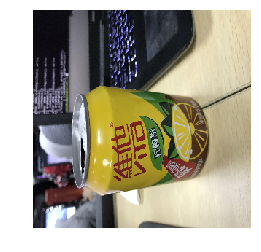

../images/WechatIMG38.jpeg


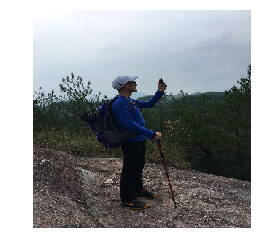

In [17]:
writer = tf.python_io.TFRecordWriter(os.path.join(record_dir,"train.tfrecords"))
for img_name in os.listdir(img_dir):
    
    img_path = os.path.join(img_dir,img_name)
    print(img_path)
    img = Image.open(img_path)
    img = img.resize((299, 299))
    plt.figure(1)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    img_raw = img.tobytes()              #将图片转化为原生bytes
    index = 1
    """
    readImage = tf.decode_raw(img_raw, tf.uint8)
    readImage=tf.reshape(readImage,[299,299,3])
    readImage = tf.image.encode_jpeg(readImage)
    readImage = readImage.eval()
    
    print(readImage)
    
    plt.figure(2)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    """
    example = tf.train.Example(features=tf.train.Features(feature={
        'img_raw': tf.train.Feature(bytes_list=tf.train.BytesList(value=[img_raw]))
        ,'label':tf.train.Feature(int64_list=tf.train.Int64List(value=[index]))
    }))
    writer.write(example.SerializeToString())  #序列化为字符串
writer.close()

In [21]:
tf.__version__

'1.1.0'

INFO:tensorflow:Error reported to Coordinator: <class 'tensorflow.python.framework.errors_impl.InvalidArgumentError'>, Input to reshape is a tensor with 89401 values, but the requested shape has 268203
	 [[Node: Reshape = Reshape[T=DT_UINT8, Tshape=DT_INT32, _device="/job:localhost/replica:0/task:0/gpu:0"](DecodeRaw/_3, Reshape/shape)]]

Caused by op 'Reshape', defined at:
  File "E:\ProgramData\Anaconda3\envs\tfxgb\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "E:\ProgramData\Anaconda3\envs\tfxgb\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "E:\ProgramData\Anaconda3\envs\tfxgb\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "E:\ProgramData\Anaconda3\envs\tfxgb\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "E:\ProgramData\Anaconda3\envs\tfxgb\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IO

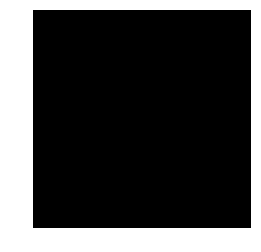

(5, 299, 299, 3)


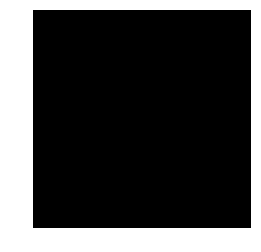

(5, 299, 299, 3)


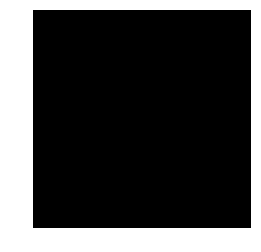

InvalidArgumentError: Input to reshape is a tensor with 89401 values, but the requested shape has 268203
	 [[Node: Reshape = Reshape[T=DT_UINT8, Tshape=DT_INT32, _device="/job:localhost/replica:0/task:0/gpu:0"](DecodeRaw/_3, Reshape/shape)]]

Caused by op 'Reshape', defined at:
  File "E:\ProgramData\Anaconda3\envs\tfxgb\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "E:\ProgramData\Anaconda3\envs\tfxgb\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "E:\ProgramData\Anaconda3\envs\tfxgb\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "E:\ProgramData\Anaconda3\envs\tfxgb\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "E:\ProgramData\Anaconda3\envs\tfxgb\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "E:\ProgramData\Anaconda3\envs\tfxgb\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "E:\ProgramData\Anaconda3\envs\tfxgb\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "E:\ProgramData\Anaconda3\envs\tfxgb\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "E:\ProgramData\Anaconda3\envs\tfxgb\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "E:\ProgramData\Anaconda3\envs\tfxgb\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "E:\ProgramData\Anaconda3\envs\tfxgb\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "E:\ProgramData\Anaconda3\envs\tfxgb\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "E:\ProgramData\Anaconda3\envs\tfxgb\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "E:\ProgramData\Anaconda3\envs\tfxgb\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "E:\ProgramData\Anaconda3\envs\tfxgb\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "E:\ProgramData\Anaconda3\envs\tfxgb\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "E:\ProgramData\Anaconda3\envs\tfxgb\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "E:\ProgramData\Anaconda3\envs\tfxgb\lib\site-packages\IPython\core\interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "E:\ProgramData\Anaconda3\envs\tfxgb\lib\site-packages\IPython\core\interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "E:\ProgramData\Anaconda3\envs\tfxgb\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-eb174e867036>", line 1, in <module>
    img = read_and_decode("../local/train.tfrecords")
  File "<ipython-input-2-3447a341c868>", line 13, in read_and_decode
    img = tf.reshape(img, [299, 299, 3])
  File "E:\ProgramData\Anaconda3\envs\tfxgb\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 2510, in reshape
    name=name)
  File "E:\ProgramData\Anaconda3\envs\tfxgb\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 768, in apply_op
    op_def=op_def)
  File "E:\ProgramData\Anaconda3\envs\tfxgb\lib\site-packages\tensorflow\python\framework\ops.py", line 2336, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "E:\ProgramData\Anaconda3\envs\tfxgb\lib\site-packages\tensorflow\python\framework\ops.py", line 1228, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Input to reshape is a tensor with 89401 values, but the requested shape has 268203
	 [[Node: Reshape = Reshape[T=DT_UINT8, Tshape=DT_INT32, _device="/job:localhost/replica:0/task:0/gpu:0"](DecodeRaw/_3, Reshape/shape)]]
